# Explaintory Data Analysis

Extracting Insights

In [2]:
# Importing libraries
# Numpy for array operations and also to do calculations
import numpy as np
# Pandas for load dataset and manipulation of tabular data
import pandas as pd
# For plotting 
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline

#from matplotlib import rcParams
#import matplotlib.gridspec as gridspec
#from IPython.core.pylabtools import figsize
#from datasist.structdata import detect_outliers

# For importing dataset from url
import urllib.request
# To interact with the underlying Operating System
import os
# For numerical computation and ML modeling phase 
import tensorflow as tf
# to manipulate date and time
from datetime import datetime, timedelta

In [3]:
# Download dataset from repo raw file link is a must to be able to load the file
# &> /dev/null
!wget https://raw.githubusercontent.com/RamyGendy/Airline-Flight-Price-Prediction/main/data_train_cleaned.csv

--2023-06-06 10:21:08--  https://raw.githubusercontent.com/RamyGendy/Airline-Flight-Price-Prediction/main/data_train_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1648650 (1.6M) [text/plain]
Saving to: ‘data_train_cleaned.csv’

data_train_cleaned. 100%[===================>]   1.57M  --.-KB/s    in 0.06s   

2023-06-06 10:21:08 (24.9 MB/s) - ‘data_train_cleaned.csv’ saved [1648650/1648650]



In [4]:
df = pd.read_csv("data_train_cleaned.csv")

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,routes_count,dep_date_time,trip_duration,arrival_date_time
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20:00,01:10 22 Mar,2h 50m,0,No info,3897,0,2019-03-24 22:20:00,0 days 02:50:00,2019-03-25 01:10:00
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2,No info,7662,2,2019-05-01 05:50:00,0 days 07:25:00,2019-05-01 13:15:00
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,19h,2,No info,13882,2,2019-06-09 09:25:00,0 days 19:00:00,2019-06-10 04:25:00
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1,No info,6218,1,2019-05-12 18:05:00,0 days 05:25:00,2019-05-12 23:30:00
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1,No info,13302,1,2019-03-01 16:50:00,0 days 04:45:00,2019-03-01 21:35:00


In [6]:
df.shape

(10460, 15)

In [7]:
df.describe()

,Total_Stops,Price,routes_count
count,10460.000000,10460.000000,10460.000000
mean,0.802199,9026.463958,0.802199
std,0.660565,4624.332709,0.660565
min,0.000000,1759.000000,0.000000
25%,0.000000,5224.000000,0.000000
50%,1.000000,8266.000000,1.000000
75%,1.000000,12342.250000,1.000000
max,4.000000,79512.000000,4.000000


In [35]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'routes_count', 'dep_date_time',
       'trip_duration', 'arrival_date_time'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10460 entries, 0 to 10459
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10460 non-null  object
 1   Date_of_Journey    10460 non-null  object
 2   Source             10460 non-null  object
 3   Destination        10460 non-null  object
 4   Route              10460 non-null  object
 5   Dep_Time           10460 non-null  object
 6   Arrival_Time       10460 non-null  object
 7   Duration           10460 non-null  object
 8   Total_Stops        10460 non-null  int64 
 9   Additional_Info    10460 non-null  object
 10  Price              10460 non-null  int64 
 11  routes_count       10460 non-null  int64 
 12  dep_date_time      10460 non-null  object
 13  trip_duration      10460 non-null  object
 14  arrival_date_time  10460 non-null  object
dtypes: int64(3), object(12)
memory usage: 1.2+ MB


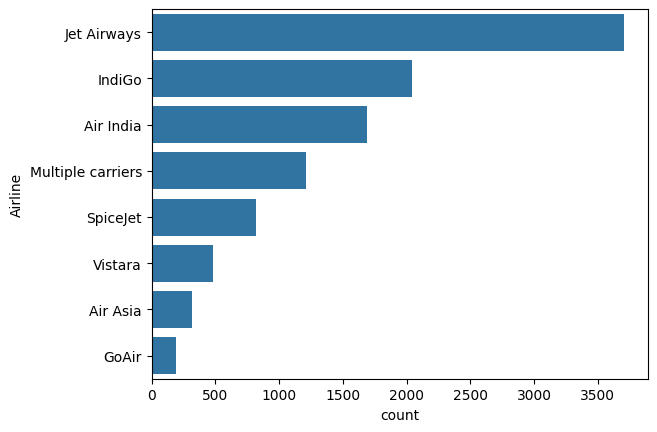

In [28]:
base_color = sns.color_palette()[0]

sns.countplot(data=df, y="Airline", color = base_color, order=df['Airline'].value_counts().index);

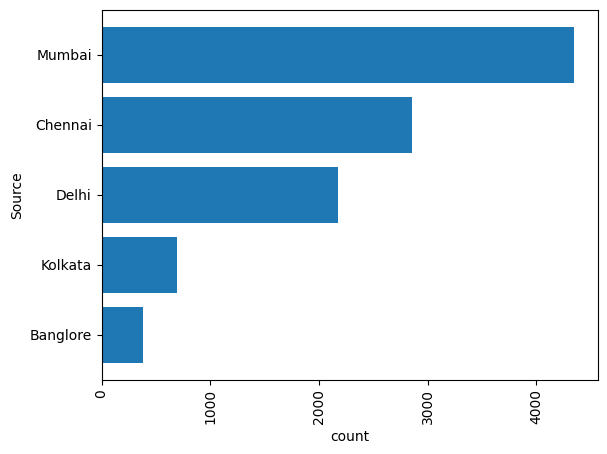

In [37]:
# Return the Series having unique values
x = df['Source'].unique()

# Return the Series having frequency count of each unique value
y = df['Source'].value_counts().sort_values()

plt.barh(x, y)

# Labeling the axes
plt.xlabel('count')
plt.ylabel('Source')
plt.xticks(rotation=90)
# Dsiplay the plot
plt.show();

In [33]:
df['Airline'].value_counts()

Jet Airways          3706
IndiGo               2043
Air India            1693
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

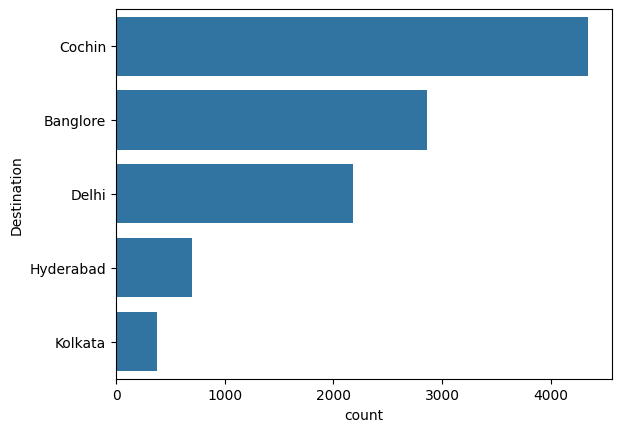

In [38]:
base_color = sns.color_palette()[0]

sns.countplot(data=df, y="Destination", color = base_color, order=df['Destination'].value_counts().index);